In [47]:
%reload_ext autoreload
%autoreload 2

In [48]:
import os

from anki_cards import AnkiDeck, FretboardCardGenerator
from fretboard import FretBoard
from fretboard_utils import draw

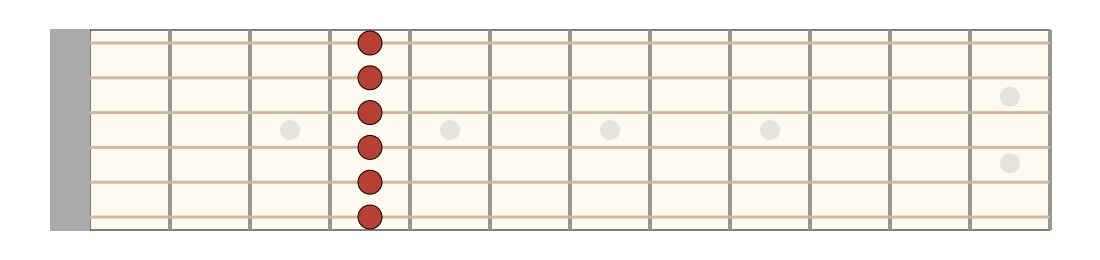

In [49]:
fretboard = FretBoard()
for string in range(1, 7):
    fretboard.add_note(string, 4)

draw(fretboard)

In [62]:
DECK_NAME = "Guitar"
ANKI_USER_NAME = "User 1"
COLLECTION_PATH = os.path.expanduser(f"~/Library/Application Support/Anki2/{ANKI_USER_NAME}/collection.anki2")
ANKI_MEDIA_PATH = os.path.expanduser(f"~/Library/Application Support/Anki2/{ANKI_USER_NAME}/collection.media")

anki_deck = AnkiDeck(DECK_NAME, ANKI_USER_NAME, COLLECTION_PATH, ANKI_MEDIA_PATH)

In [60]:
label_notes_ascending = lambda _: "Label these notes in ascending order. FAKE STUPID TEST."
barre_img_fname = lambda fret: f"barre_{fret}.png"
def barre_question_fretboard(fret):
    fretboard = FretBoard()
    for string in range(1, 7):
        fretboard.add_note(string, fret)
    return fretboard
def barre_answer(fret, descending=False):
    chromatic = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    lowest = fret + 4
    notes = [lowest, lowest + 5, lowest + 10, lowest + 15, lowest + 19, lowest + 24]
    if descending:
        notes = notes[::-1]
    return ", ".join([chromatic[n % 12] for n in notes])

Label these notes in ascending order. FAKE STUPID TEST.


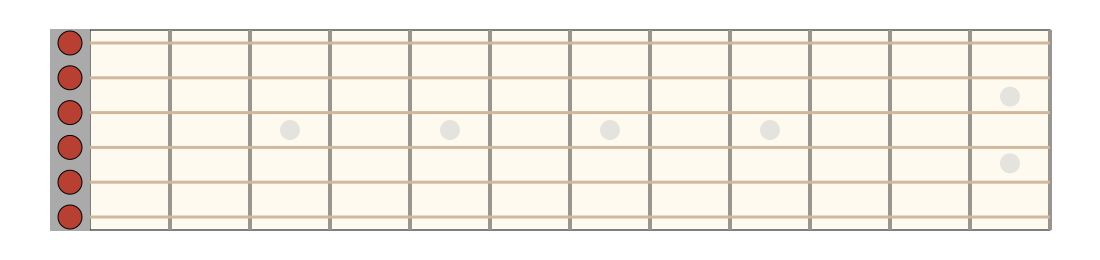

--------------------------------------------------
E, A, D, G, B, E
Label these notes in ascending order. FAKE STUPID TEST.


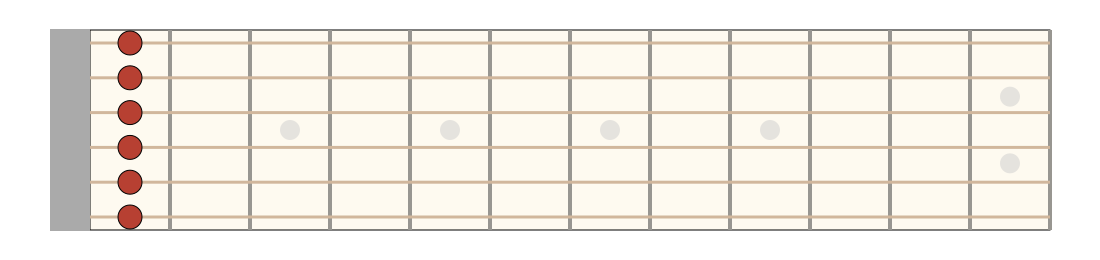

--------------------------------------------------
F, A#, D#, G#, C, F
Label these notes in ascending order. FAKE STUPID TEST.


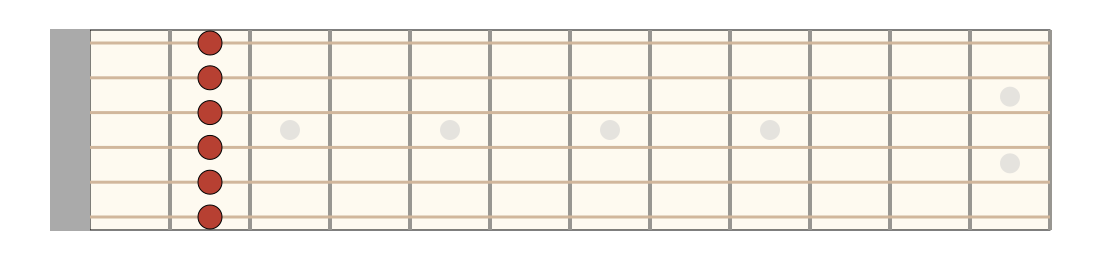

--------------------------------------------------
F#, B, E, A, C#, F#
Label these notes in ascending order. FAKE STUPID TEST.


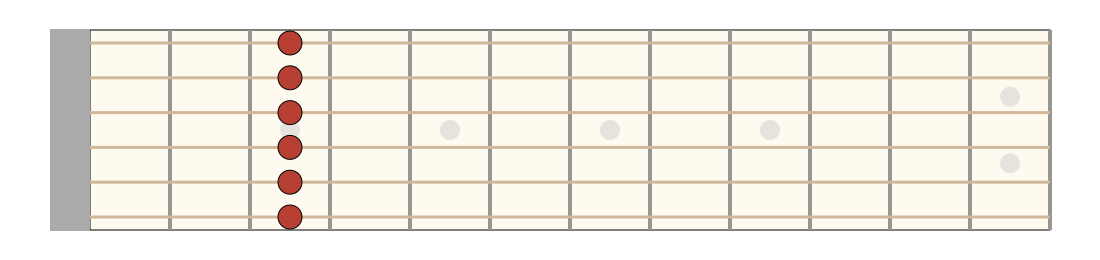

--------------------------------------------------
G, C, F, A#, D, G


In [75]:
generator = FretboardCardGenerator(
    question_fn=label_notes_ascending,
    answer_fn=barre_answer,
    fretboard_fn=barre_question_fretboard,
)

generator.generate_cards(deck=anki_deck, print_to_ipynb=True, args_sequence=[(i,) for i in range(4)])